# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [190]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
pd.set_option('display.max_columns', None)
plt.rcParams.update({'font.size': 12})

## 1. Data Cleaning

In [2]:
df = pd.read_csv('training_data.csv' , index_col=0)
hold = pd.read_csv('holdout_data.csv' , index_col=0)


In [3]:
df.Y.value_counts()

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [4]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Y', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = df['Y'] # y is the column we're trying to predict

In [5]:
df['X3'].value_counts()

2            10516
1             7919
3             3713
5              208
4               90
6               42
0               11
EDUCATION        1
Name: X3, dtype: int64

In [6]:
# Putting names of columns in from the row in dictionary to change later
names = dict(df.loc['ID'])
names

{'X1': 'LIMIT_BAL',
 'X2': 'SEX',
 'X3': 'EDUCATION',
 'X4': 'MARRIAGE',
 'X5': 'AGE',
 'X6': 'PAY_0',
 'X7': 'PAY_2',
 'X8': 'PAY_3',
 'X9': 'PAY_4',
 'X10': 'PAY_5',
 'X11': 'PAY_6',
 'X12': 'BILL_AMT1',
 'X13': 'BILL_AMT2',
 'X14': 'BILL_AMT3',
 'X15': 'BILL_AMT4',
 'X16': 'BILL_AMT5',
 'X17': 'BILL_AMT6',
 'X18': 'PAY_AMT1',
 'X19': 'PAY_AMT2',
 'X20': 'PAY_AMT3',
 'X21': 'PAY_AMT4',
 'X22': 'PAY_AMT5',
 'X23': 'PAY_AMT6',
 'Y': 'default payment next month'}

In [7]:
# Renaming columns
df = df.rename(columns = names)
df = df.rename(columns = {'PAY_0': 'PAY_1'})
df = df.rename(columns = {'default payment next month': 'default'})

In [8]:
df.index.names = ["ID"]

In [9]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [10]:
df.shape

(22500, 24)

In [11]:
# Removing row with columns names to convert to number 
df = df.drop('ID')

In [12]:
# Converting datatype of whole dataset to int 
df = df.astype(int)

In [13]:
df.shape

(22499, 24)

In [14]:
df = df.sort_index()

In [15]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0
100,20000,1,2,1,38,0,0,0,0,0,-1,17973,19367,19559,18240,17928,150,1699,1460,626,1750,150,0,1
1000,120000,1,2,2,25,2,2,0,0,0,0,113348,110119,111700,83858,86434,88802,0,5000,3158,3934,3802,2000,0
10001,260000,2,1,1,40,-2,-2,-2,-2,-2,-2,2500,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df.EDUCATION.value_counts()

2    10516
1     7919
3     3713
5      208
4       90
6       42
0       11
Name: EDUCATION, dtype: int64

In [17]:
df['EDUCATION'] = df['EDUCATION'].replace(0,4)
df['EDUCATION'] = df['EDUCATION'].replace(5,4)
df['EDUCATION'] = df['EDUCATION'].replace(6,4)

In [18]:
df.EDUCATION.value_counts()

2    10516
1     7919
3     3713
4      351
Name: EDUCATION, dtype: int64

In [19]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

In [20]:
df['MARRIAGE'].value_counts()

2    12026
1    10195
3      278
Name: MARRIAGE, dtype: int64

In [21]:
df['PAY_1'] = df['PAY_1'].replace(-2,-1)
df['PAY_2'] = df['PAY_2'].replace(-2,-1)
df['PAY_3'] = df['PAY_3'].replace(-2,-1)
df['PAY_4'] = df['PAY_4'].replace(-2,-1)
df['PAY_5'] = df['PAY_5'].replace(-2,-1)
df['PAY_6'] = df['PAY_6'].replace(-2,-1)

## 2. EDA

Target Variable
0    17471
1     5028
Name: default, dtype: int64


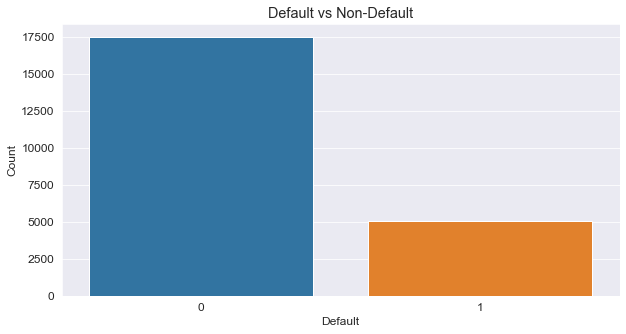

In [22]:
print('Target Variable')
print(df['default'].value_counts())

sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['default'])
plt.title('Default vs Non-Default')
plt.ylabel('Count')
plt.xlabel('Default')
plt.show()

default          0          1
SEX                          
1        38.681243  43.138425
2        61.318757  56.861575


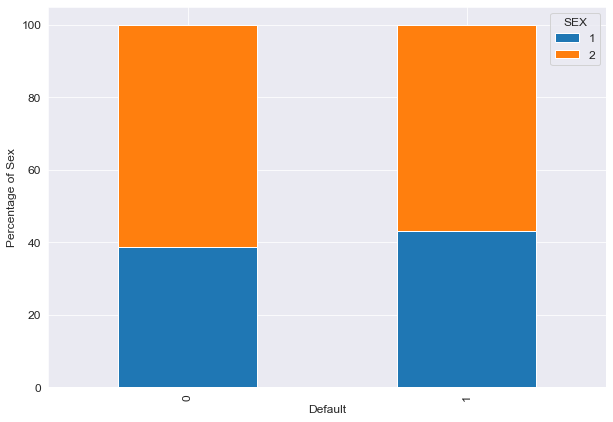

In [23]:
d = df.groupby(['SEX', 'default'])['SEX'].count().unstack()
print((d/d.sum())*100)
((d/d.sum())*100).transpose().plot(kind = 'bar', stacked = True, figsize = (10,7))
plt.xlabel('Default')
plt.ylabel('Percentage of Sex')
plt.show()

default           0          1
MARRIAGE                      
1         44.473699  48.229912
2         54.232729  50.735879
3          1.293572   1.034208


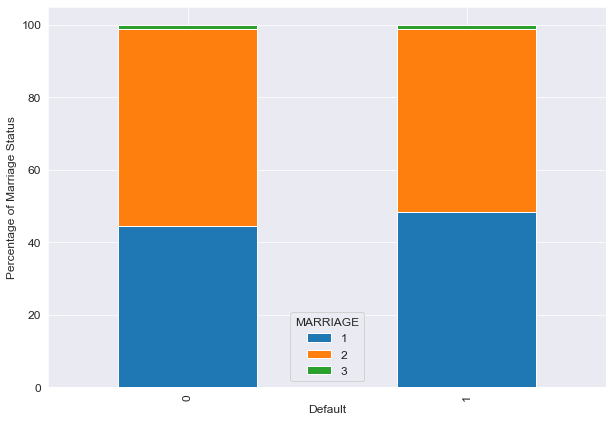

In [24]:
f = df.groupby(['MARRIAGE', 'default'])['MARRIAGE'].count().unstack()
print((f/f.sum())*100)
((f/f.sum())*100).transpose().plot(kind = 'bar', stacked = True, figsize = (10,7))
plt.xlabel('Default')
plt.ylabel('Percentage of Marriage Status')
plt.show()

default            0          1
EDUCATION                      
1          36.563448  30.449483
2          45.778719  50.079554
3          15.820503  18.874304
4           1.837330   0.596659


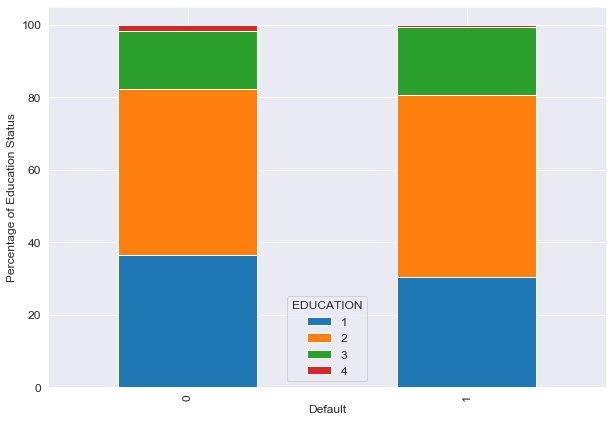

In [25]:
e = df.groupby(['EDUCATION', 'default'])['EDUCATION'].count().unstack()
print((e/e.sum())*100)
((e/e.sum())*100).transpose().plot(kind = 'bar', stacked = True, figsize = (10,7))
plt.xlabel('Default')
plt.ylabel('Percentage of Education Status')
plt.show()

In [26]:
df[df.LIMIT_BAL > 800000]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
2198,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


## 3. Feature Engineering

In [27]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1
10,20000,1,3,2,35,-1,-1,-1,-1,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0
100,20000,1,2,1,38,0,0,0,0,0,-1,17973,19367,19559,18240,17928,150,1699,1460,626,1750,150,0,1
1000,120000,1,2,2,25,2,2,0,0,0,0,113348,110119,111700,83858,86434,88802,0,5000,3158,3934,3802,2000,0
10001,260000,2,1,1,40,-1,-1,-1,-1,-1,-1,2500,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df['avg_bill'] = round((df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6'])/6,2 )
df['avg_pay'] = round((df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6'])/6,2 )


In [29]:
bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
paid = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
new_cols = ['out1', 'out2', 'out3', 'out4', 'out5', 'out6']
for i in range(len(bill)):
    df[new_cols[i]] = round(df[bill[i]] - df[paid[i]],2)

In [30]:
# Creating Percentage used for every month
cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
new_cols = ['per1', 'per2', 'per3', 'per4', 'per5', 'per6']
for i in range(len(cols)):
    df[new_cols[i]] = round(df[cols[i]]/df['LIMIT_BAL']*100,2)


In [31]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,avg_bill,avg_pay,out1,out2,out3,out4,out5,out6,per1,per2,per3,per4,per5,per6
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1284.00,114.83,3913,2413,689,0,0,0,19.56,15.51,3.44,0.00,0.00,0.00
10,20000,1,3,2,35,-1,-1,-1,-1,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,4486.50,2354.83,0,0,0,-13007,11885,13912,0.00,0.00,0.00,0.00,65.04,69.56
100,20000,1,2,1,38,0,0,0,0,0,-1,17973,19367,19559,18240,17928,150,1699,1460,626,1750,150,0,1,15536.17,947.50,16274,17907,18933,16490,17778,150,89.86,96.84,97.80,91.20,89.64,0.75
1000,120000,1,2,2,25,2,2,0,0,0,0,113348,110119,111700,83858,86434,88802,0,5000,3158,3934,3802,2000,0,99043.50,2982.33,113348,105119,108542,79924,82632,86802,94.46,91.77,93.08,69.88,72.03,74.00
10001,260000,2,1,1,40,-1,-1,-1,-1,-1,-1,2500,0,0,0,0,0,0,0,0,0,0,0,0,416.67,0.00,2500,0,0,0,0,0,0.96,0.00,0.00,0.00,0.00,0.00


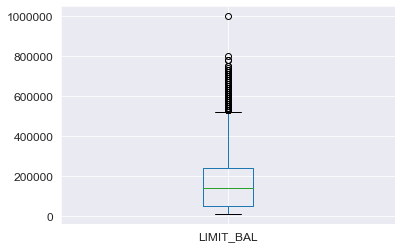

In [32]:
df.boxplot(['LIMIT_BAL'])

In [33]:
cont = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6']
poly_df = df[cont]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(poly_df)
poly_columns = poly.get_feature_names(poly_df.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns, index = df.index)

In [34]:
df_poly.head()

,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,per1,per2,per3,per4,per5,per6,LIMIT_BAL^2,LIMIT_BAL AGE,LIMIT_BAL BILL_AMT1,LIMIT_BAL PAY_AMT1,LIMIT_BAL PAY_AMT2,LIMIT_BAL PAY_AMT3,LIMIT_BAL PAY_AMT4,LIMIT_BAL PAY_AMT5,LIMIT_BAL PAY_AMT6,LIMIT_BAL per1,LIMIT_BAL per2,LIMIT_BAL per3,LIMIT_BAL per4,LIMIT_BAL per5,LIMIT_BAL per6,AGE^2,AGE BILL_AMT1,AGE PAY_AMT1,AGE PAY_AMT2,AGE PAY_AMT3,AGE PAY_AMT4,AGE PAY_AMT5,AGE PAY_AMT6,AGE per1,AGE per2,AGE per3,AGE per4,AGE per5,AGE per6,BILL_AMT1^2,BILL_AMT1 PAY_AMT1,BILL_AMT1 PAY_AMT2,BILL_AMT1 PAY_AMT3,BILL_AMT1 PAY_AMT4,BILL_AMT1 PAY_AMT5,BILL_AMT1 PAY_AMT6,BILL_AMT1 per1,BILL_AMT1 per2,BILL_AMT1 per3,BILL_AMT1 per4,BILL_AMT1 per5,BILL_AMT1 per6,PAY_AMT1^2,PAY_AMT1 PAY_AMT2,PAY_AMT1 PAY_AMT3,PAY_AMT1 PAY_AMT4,PAY_AMT1 PAY_AMT5,PAY_AMT1 PAY_AMT6,PAY_AMT1 per1,PAY_AMT1 per2,PAY_AMT1 per3,PAY_AMT1 per4,PAY_AMT1 per5,PAY_AMT1 per6,PAY_AMT2^2,PAY_AMT2 PAY_AMT3,PAY_AMT2 PAY_AMT4,PAY_AMT2 PAY_AMT5,PAY_AMT2 PAY_AMT6,PAY_AMT2 per1,PAY_AMT2 per2,PAY_AMT2 per3,PAY_AMT2 per4,PAY_AMT2 per5,PAY_AMT2 per6,PAY_AMT3^2,PAY_AMT3 PAY_AMT4,PAY_AMT3 PAY_AMT5,PAY_AMT3 PAY_AMT6,PAY_AMT3 per1,PAY_AMT3 per2,PAY_AMT3 per3,PAY_AMT3 per4,PAY_AMT3 per5,PAY_AMT3 per6,PAY_AMT4^2,PAY_AMT4 PAY_AMT5,PAY_AMT4 PAY_AMT6,PAY_AMT4 per1,PAY_AMT4 per2,PAY_AMT4 per3,PAY_AMT4 per4,PAY_AMT4 per5,PAY_AMT4 per6,PAY_AMT5^2,PAY_AMT5 PAY_AMT6,PAY_AMT5 per1,PAY_AMT5 per2,PAY_AMT5 per3,PAY_AMT5 per4,PAY_AMT5 per5,PAY_AMT5 per6,PAY_AMT6^2,PAY_AMT6 per1,PAY_AMT6 per2,PAY_AMT6 per3,PAY_AMT6 per4,PAY_AMT6 per5,PAY_AMT6 per6,per1^2,per1 per2,per1 per3,per1 per4,per1 per5,per1 per6,per2^2,per2 per3,per2 per4,per2 per5,per2 per6,per3^2,per3 per4,per3 per5,per3 per6,per4^2,per4 per5,per4 per6,per5^2,per5 per6,per6^2
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24.0,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,19.56,15.51,3.44,0.00,0.00,0.00,4.000000e+08,480000.0,7.826000e+07,0.0,13780000.0,0.0,0.0,0.0,0.0,391200.0,310200.0,68800.0,0.0,0.0,0.0,576.0,93912.0,0.0,16536.0,0.0,0.0,0.0,0.0,469.44,372.24,82.56,0.0,0.00,0.0,1.531157e+07,0.0,2696057.0,0.0,0.0,0.0,0.0,76538.28,60690.63,13460.72,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,474721.0,0.0,0.0,0.0,0.0,13476.84,10686.39,2370.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,382.5936,303.3756,67.2864,0.0000,0.0000,0.000,240.5601,53.3544,0.0000,0.0000,0.00,11.8336,0.0000,0.0000,0.00,0.0000,0.0000,0.00,0.0000,0.0000,0.0000
10,20000.0,35.0,0.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.00,0.00,0.00,0.00,65.04,69.56,4.000000e+08,700000.0,0.000000e+00,0.0,0.0,0.0,260140000.0,22440000.0,0.0,0.0,0.0,0.0,0.0,1300800.0,1391200.0,1225.0,0.0,0.0,0.0,0.0,455245.0,39270.0,0.0,0.00,0.00,0.00,0.0,2276.40,2434.6,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,169182049.0,14593854.0,0.0,0.00,0.00,0.00,0.00,845975.28,904766.92,1258884.0,0.0,0.00,0.00,0.00,0.00,72974.88,78046.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.00,4230.2016,4524.1824,4838.5936
100,20000.0,38.0,17973.0,1699.0,1460.0,626.0,1750.0,150.0,0.0,89.86,96.84,97.80,91.20,89.64,0.75,4.000000e+08,760000.0,3.594600e+08,33980000.0,29200000.0,12520000.0,35000000.0,3000000.0,0.0,1797200.0,1936800.0,1956000.0,1824000.0,1792800.0,15000.0,1444.0,682974.0,64562.0,55480.0,23788.0,66500.0,5700.0,0.0,3414.68,3679.92,3716.40,3465.6,3406.32,28.5,3.230287e+08,30536127.0,26240580.0,11251098.0,31452750.0,2695950.0,0.0,1615053.78,1740505.32,1757759.40,1639137.60,1611099.72,13479.75,2886601.0,2480540.0,1063574.0,2973250.0,254850.0,0.0,152672.14,164531.16,16616

In [35]:
df.shape

(22499, 38)

In [36]:
df = pd.concat([df,df_poly], axis=1, join='inner')

In [37]:
df.shape

(22499, 173)

In [38]:
#Removing duplicate columns after joining 
df = df.loc[:,~df.columns.duplicated()]

In [39]:
target = df['default']
df =  pd.get_dummies(df, columns=['SEX'], drop_first = True )
df =  pd.get_dummies(df, columns=['EDUCATION'], drop_first = True )
df =  pd.get_dummies(df, columns=['MARRIAGE'], drop_first = True )
df =  pd.get_dummies(df, columns=['PAY_1'], drop_first = True )
df =  pd.get_dummies(df, columns=['PAY_2'], drop_first = True )
df =  pd.get_dummies(df, columns=['PAY_3'], drop_first = True )
df =  pd.get_dummies(df, columns=['PAY_4'], drop_first = True )
df =  pd.get_dummies(df, columns=['PAY_5'], drop_first = True )
df =  pd.get_dummies(df, columns=['PAY_6'], drop_first = True )


In [40]:
df.shape

(22499, 207)

## 4. Feature Selection

In [41]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,avg_bill,avg_pay,out1,out2,out3,out4,out5,out6,per1,per2,per3,per4,per5,per6,LIMIT_BAL^2,LIMIT_BAL AGE,LIMIT_BAL BILL_AMT1,LIMIT_BAL PAY_AMT1,LIMIT_BAL PAY_AMT2,LIMIT_BAL PAY_AMT3,LIMIT_BAL PAY_AMT4,LIMIT_BAL PAY_AMT5,LIMIT_BAL PAY_AMT6,LIMIT_BAL per1,LIMIT_BAL per2,LIMIT_BAL per3,LIMIT_BAL per4,LIMIT_BAL per5,LIMIT_BAL per6,AGE^2,AGE BILL_AMT1,AGE PAY_AMT1,AGE PAY_AMT2,AGE PAY_AMT3,AGE PAY_AMT4,AGE PAY_AMT5,AGE PAY_AMT6,AGE per1,AGE per2,AGE per3,AGE per4,AGE per5,AGE per6,BILL_AMT1^2,BILL_AMT1 PAY_AMT1,BILL_AMT1 PAY_AMT2,BILL_AMT1 PAY_AMT3,BILL_AMT1 PAY_AMT4,BILL_AMT1 PAY_AMT5,BILL_AMT1 PAY_AMT6,BILL_AMT1 per1,BILL_AMT1 per2,BILL_AMT1 per3,BILL_AMT1 per4,BILL_AMT1 per5,BILL_AMT1 per6,PAY_AMT1^2,PAY_AMT1 PAY_AMT2,PAY_AMT1 PAY_AMT3,PAY_AMT1 PAY_AMT4,PAY_AMT1 PAY_AMT5,PAY_AMT1 PAY_AMT6,PAY_AMT1 per1,PAY_AMT1 per2,PAY_AMT1 per3,PAY_AMT1 per4,PAY_AMT1 per5,PAY_AMT1 per6,PAY_AMT2^2,PAY_AMT2 PAY_AMT3,PAY_AMT2 PAY_AMT4,PAY_AMT2 PAY_AMT5,PAY_AMT2 PAY_AMT6,PAY_AMT2 per1,PAY_AMT2 per2,PAY_AMT2 per3,PAY_AMT2 per4,PAY_AMT2 per5,PAY_AMT2 per6,PAY_AMT3^2,PAY_AMT3 PAY_AMT4,PAY_AMT3 PAY_AMT5,PAY_AMT3 PAY_AMT6,PAY_AMT3 per1,PAY_AMT3 per2,PAY_AMT3 per3,PAY_AMT3 per4,PAY_AMT3 per5,PAY_AMT3 per6,PAY_AMT4^2,PAY_AMT4 PAY_AMT5,PAY_AMT4 PAY_AMT6,PAY_AMT4 per1,PAY_AMT4 per2,PAY_AMT4 per3,PAY_AMT4 per4,PAY_AMT4 per5,PAY_AMT4 per6,PAY_AMT5^2,PAY_AMT5 PAY_AMT6,PAY_AMT5 per1,PAY_AMT5 per2,PAY_AMT5 per3,PAY_AMT5 per4,PAY_AMT5 per5,PAY_AMT5 per6,PAY_AMT6^2,PAY_AMT6 per1,PAY_AMT6 per2,PAY_AMT6 per3,PAY_AMT6 per4,PAY_AMT6 per5,PAY_AMT6 per6,per1^2,per1 per2,per1 per3,per1 per4,per1 per5,per1 per6,per2^2,per2 per3,per2 per4,per2 per5,per2 per6,per3^2,per3 per4,per3 per5,per3 per6,per4^2,per4 per5,per4 per6,per5^2,per5 per6,per6^2,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
LIMIT_BAL,NaN,0.146964,0.295659,0.288841,0.288696,0.299262,0.299236,0.294636,0.196075,0.165682,0.211372,0.199648,0.216146,0.224594,0.155958,0.309080,0.343312,0.253961,0.227156,0.234207,0.251301,0.244805,0.224505,0.363611,0.367210,0.357129,0.351012,0.337173,0.318580,0.944200,0.942585,0.457971,0.294216,0.211126,0.234115,0.271608,0.297079,0.288880,0.295659,0.288841,0.288695,0.299262,0.299236,0.294637,0.115574,0.298576,0.199462,0.173972,0.210451,0.210728,0.223393,0.229342,0.307870,0.312513,0.305550,0.299329,0.287790,0.272520,0.334041,0.190743,0.185277,0.116389,0.151088,0.167601,0.163045,0.171639,0.166834,0.163798,0.169347,0.171775,0.170501,0.055390,0.028405,0.032119,0.031477,0.109325,0.080031,0.090972,0.078030,0.073503,0.078012,0.075631,0.075221,0.039177,0.031239,0.027028,0.034074,0.079128,0.075886,0.075680,0.020009,0.094053,0.085740,0.052753,0.079100,0.038340,0.110562,0.097425,0.096016,0.094908,0.112270,0.106460,0.098617,0.097327,0.082141,0.119093,0.106022,0.076233,0.074689,0.080390,0.094313,0.089594,0.088009,0.105786,0.130070,0.082259,0.078864,0.051596,0.097408,0.105280,0.096949,0.108208,0.095303,0.092620,0.099153,0.103182,0.106545,0.097486,0.238557,0.239503,0.259073,0.256752,0.248933,0.261696,0.243438,0.265211,0.261068,0.253307,0.267524,0.152239,0.270064,0.261840,0.266119,0.265682,0.258754,0.275083,0.255874,0.274933,0.277401,0.021080,0.148857,0.141774,0.010605,0.089221,0.049389,0.097790,0.052475,0.134128,0.067959,0.032744,0.020340,0.010672,0.005289,0.008696,0.115974,0.007556,0.179362,0.066706,0.041322,0.019725,0.006471,0.010180,0.006523,0.116551,0.014678,0.174591,0.065854,0.036510,0.009359,0.014540,0.023601,0.008499,0.110370,0.01

In [42]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

['BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'avg_bill',
 'out1',
 'out2',
 'out3',
 'out4',
 'out5',
 'out6',
 'per2',
 'per3',
 'per5',
 'per6',
 'LIMIT_BAL^2',
 'LIMIT_BAL AGE',
 'LIMIT_BAL PAY_AMT1',
 'LIMIT_BAL PAY_AMT2',
 'LIMIT_BAL PAY_AMT4',
 'LIMIT_BAL PAY_AMT5',
 'LIMIT_BAL PAY_AMT6',
 'LIMIT_BAL per1',
 'LIMIT_BAL per2',
 'LIMIT_BAL per3',
 'LIMIT_BAL per4',
 'LIMIT_BAL per5',
 'LIMIT_BAL per6',
 'AGE^2',
 'AGE BILL_AMT1',
 'AGE PAY_AMT1',
 'AGE PAY_AMT2',
 'AGE PAY_AMT3',
 'AGE PAY_AMT4',
 'AGE PAY_AMT5',
 'AGE PAY_AMT6',
 'AGE per1',
 'AGE per2',
 'AGE per3',
 'AGE per4',
 'AGE per5',
 'AGE per6',
 'BILL_AMT1^2',
 'BILL_AMT1 per1',
 'BILL_AMT1 per2',
 'BILL_AMT1 per3',
 'BILL_AMT1 per4',
 'BILL_AMT1 per5',
 'BILL_AMT1 per6',
 'PAY_AMT1 PAY_AMT4',
 'PAY_AMT1 per1',
 'PAY_AMT1 per3',
 'PAY_AMT1 per5',
 'PAY_AMT1 per6',
 'PAY_AMT2 PAY_AMT3',
 'PAY_AMT2 PAY_AMT4',
 'PAY_AMT2 per5',
 'PAY_AMT3 PAY_AMT4',
 'PAY_AMT3 per2',
 'PAY_AMT3 per5',
 'PAY_AMT3 p

In [43]:
df.drop(columns = to_drop, inplace = True)

In [44]:
df.head()

,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,avg_pay,per1,per4,LIMIT_BAL BILL_AMT1,LIMIT_BAL PAY_AMT3,BILL_AMT1 PAY_AMT1,BILL_AMT1 PAY_AMT2,BILL_AMT1 PAY_AMT3,BILL_AMT1 PAY_AMT4,BILL_AMT1 PAY_AMT5,BILL_AMT1 PAY_AMT6,PAY_AMT1^2,PAY_AMT1 PAY_AMT2,PAY_AMT1 PAY_AMT3,PAY_AMT1 PAY_AMT5,PAY_AMT1 PAY_AMT6,PAY_AMT1 per2,PAY_AMT1 per4,PAY_AMT2^2,PAY_AMT2 PAY_AMT5,PAY_AMT2 PAY_AMT6,PAY_AMT2 per1,PAY_AMT2 per2,PAY_AMT2 per3,PAY_AMT2 per4,PAY_AMT2 per6,PAY_AMT3^2,PAY_AMT3 PAY_AMT5,PAY_AMT3 PAY_AMT6,PAY_AMT3 per1,PAY_AMT3 per3,PAY_AMT3 per4,PAY_AMT4^2,PAY_AMT4 PAY_AMT5,PAY_AMT4 PAY_AMT6,PAY_AMT4 per1,PAY_AMT4 per3,PAY_AMT4 per4,PAY_AMT4 per5,PAY_AMT5^2,PAY_AMT5 PAY_AMT6,PAY_AMT5 per3,PAY_AMT5 per4,PAY_AMT5 per5,PAY_AMT5 per6,PAY_AMT6^2,PAY_AMT6 per1,PAY_AMT6 per6,per1^2,per1 per6,per3^2,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_8,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_7,PAY_3_8,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_8,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3913,0,689,0,0,0,0,1,114.83,19.56,0.00,7.826000e+07,0.0,0.0,2696057.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,474721.0,0.0,0.0,13476.84,10686.39,2370.16,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,382.5936,0.000,11.8336,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,20000,35,0,0,0,0,13007,1122,0,0,2354.83,0.00,0.00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,169182049.0,14593854.0,0.0,0.00,0.00,0.00,845975.28,1258884.0,0.0,0.00,0.00,72974.88,78046.32,0.0,0.0,0.0,0.0000,0.000,0.0000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,20000,38,17973,1699,1460,626,1750,150,0,1,947.50,89.86,91.20,3.594600e+08,12520000.0,30536127.0,26240580.0,11251098.0,31452750.0,2695950.0,0.0,2886601.0,2480540.0,1063574.0,254850.0,0.0,164531.16,154948.8,2131600.0,219000.0,0.0,131195.60,141386.40,142788.00,133152.0,1095.0,391876.0,93900.0,0.0,56252.36,61222.80,57091.20,3062500.0,262500.0,0.0,157255.00,171150.00,159600.00,156870.00,22500.0,0.0,14670.00,13680.00,13446.00,112.50,0.0,0.0,0.0,8074.8196,67.395,9564.8400,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000,120000,25,113348,0,5000,3158,3934,3802,2000,0,2982.33,94.46,69.88,1.360176e+10,378960000.0,0.0,566740000.0,357952984.0,445911032.0,430949096.0,226696000.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25000000.0,19010000.0,10000000.0,472300.00,458850.00,465400.00,349400.0,370000.0,9972964.0,12006716.0,6316000.0,298304.68,293946.64,220681.04,15476356.0,14957068.0,7868000.0,371605.64,366176.72,274907.92,283366.02,14455204.0,7604000.0,353890.16,265683.76,273858.06,281348.00,4000000.0,188920.0,148000.0,8922.6916,6990.040,8663.8864,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10001,260000,40,2500,0,0,0,0,0,0,0,0.00,0.96,0.00,6.500000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.9216,0.000,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
df.shape

(22499, 116)

In [46]:
target = df['default']
df_features = df.drop(columns = ['default'])

In [47]:
df_features.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'avg_pay',
       ...
       'PAY_5_6', 'PAY_5_8', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4',
       'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
      dtype='object', length=115)

### Using VIF

In [48]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_features.columns
vif.round(1)

,VIF Factor,features
0,6.600000e+00,LIMIT_BAL
1,9.300000e+00,AGE
2,1.550000e+01,BILL_AMT1
3,1.114890e+12,PAY_AMT1
4,2.409631e+12,PAY_AMT2
...,...,...
110,1.900000e+00,PAY_6_4
111,1.500000e+00,PAY_6_5
112,2.200000e+00,PAY_6_6
113,1.150000e+01,PAY_6_7


In [49]:
drop_vif =  list(vif[vif['VIF Factor'] > 9]['features'])
print(drop_vif)

['AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'avg_pay', 'per1', 'LIMIT_BAL BILL_AMT1', 'LIMIT_BAL PAY_AMT3', 'BILL_AMT1 PAY_AMT2', 'BILL_AMT1 PAY_AMT3', 'BILL_AMT1 PAY_AMT4', 'PAY_AMT1^2', 'PAY_AMT1 PAY_AMT2', 'PAY_AMT1 PAY_AMT3', 'PAY_AMT1 per2', 'PAY_AMT2^2', 'PAY_AMT2 PAY_AMT5', 'PAY_AMT2 per1', 'PAY_AMT2 per2', 'PAY_AMT2 per3', 'PAY_AMT2 per4', 'PAY_AMT2 per6', 'PAY_AMT3^2', 'PAY_AMT3 per1', 'PAY_AMT3 per4', 'PAY_AMT4^2', 'PAY_AMT4 per1', 'PAY_AMT4 per3', 'PAY_AMT4 per5', 'PAY_AMT5 per3', 'PAY_AMT5 per4', 'PAY_AMT5 per6', 'per3^2', 'PAY_4_7', 'PAY_6_7']


In [50]:
df_features.drop( columns = drop_vif, inplace = True)

In [51]:
df_features.columns

Index(['LIMIT_BAL', 'per4', 'BILL_AMT1 PAY_AMT1', 'BILL_AMT1 PAY_AMT5',
       'BILL_AMT1 PAY_AMT6', 'PAY_AMT1 PAY_AMT5', 'PAY_AMT1 PAY_AMT6',
       'PAY_AMT1 per4', 'PAY_AMT2 PAY_AMT6', 'PAY_AMT3 PAY_AMT5',
       'PAY_AMT3 PAY_AMT6', 'PAY_AMT3 per3', 'PAY_AMT4 PAY_AMT5',
       'PAY_AMT4 PAY_AMT6', 'PAY_AMT4 per4', 'PAY_AMT5^2', 'PAY_AMT5 PAY_AMT6',
       'PAY_AMT5 per5', 'PAY_AMT6^2', 'PAY_AMT6 per1', 'PAY_AMT6 per6',
       'per1^2', 'per1 per6', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_0', 'PAY_1_1',
       'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7',
       'PAY_1_8', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_8', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_7', 'PAY_3_8', 'PAY_4_0',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_8', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_

In [52]:
X = df_features
y = target

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## KNN

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [174]:
knn = KNeighborsClassifier(n_neighbors = 9)
print(knn)

KNeighborsClassifier(n_neighbors=9)


In [175]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [176]:
y_pred_class = knn.predict(X_test)

In [177]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy:0.8076444444444445


In [178]:
cm = confusion_matrix(y_test,y_pred_class)
cm

array([[4092,  296],
       [ 786,  451]])

In [179]:
knn_f1 = metrics.f1_score(y_test, y_pred_class)
print('KNN F1: ' + str(knn_f1))


KNN F1: 0.45463709677419356


In [180]:
results = {}

results['KNN'] = knn_f1

## Logistic Regression

In [60]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [61]:
y_pred_class = logreg.predict(X_test)

In [62]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.8209777777777778


In [63]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[4181  207]
 [ 800  437]]


In [64]:
log_f1 = metrics.f1_score(y_test, y_pred_class)
print('Log F1: ' + str(log_f1))


Log F1: 0.46464646464646475


In [200]:
results['Logistic Regression'] = log_f1

### Handling Imbalance

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [66]:
# Prepping data for imbalance handling
training  = pd.concat([X_train, y_train], axis=1)
training

,LIMIT_BAL,per4,BILL_AMT1 PAY_AMT1,BILL_AMT1 PAY_AMT5,BILL_AMT1 PAY_AMT6,PAY_AMT1 PAY_AMT5,PAY_AMT1 PAY_AMT6,PAY_AMT1 per4,PAY_AMT2 PAY_AMT6,PAY_AMT3 PAY_AMT5,PAY_AMT3 PAY_AMT6,PAY_AMT3 per3,PAY_AMT4 PAY_AMT5,PAY_AMT4 PAY_AMT6,PAY_AMT4 per4,PAY_AMT5^2,PAY_AMT5 PAY_AMT6,PAY_AMT5 per5,PAY_AMT6^2,PAY_AMT6 per1,PAY_AMT6 per6,per1^2,per1 per6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_8,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_7,PAY_3_8,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_8,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_8,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_8,default
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5832,140000,71.66,523255000.0,418604000.0,3.770576e+08,20000000.0,18015000.0,358300.00,12970800.0,0.0,0.0,0.00,16000000.0,14412000.0,286640.00,16000000.0,14412000.0,293560.00,1.298161e+07,269324.25,266225.67,5587.5625,5523.2775,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
28546,50000,32.24,50508000.0,50508000.0,2.520349e+07,4000000.0,1996000.0,64480.00,508980.0,32242000.0,16088758.0,16443.42,4000000.0,1996000.0,64480.00,4000000.0,1996000.0,70160.00,9.960040e+05,50408.98,38103.64,2551.2601,1928.4718,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11325,70000,12.63,55118400.0,34449000.0,5.167350e+07,1600000.0,2400000.0,20208.00,1950000.0,500000.0,750000.0,15220.00,1000000.0,1500000.0,12630.00,1000000.0,1500000.0,11620.00,2.250000e+06,73815.00,16140.00,2421.6241,529.4996,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
17642,140000,80.04,551686698.0,514243056.0,5.239554e+08,17371608.0,17699700.0,345532.68,17174900.0,21773864.0,22185100.0,449870.54,15291200.0,15580000.0,304152.00,16192576.0,16498400.0,308600.56,1.681000e+07,374248.00,315577.00,8332.0384,7025.8216,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6631,120000,57.22,229465600.0,71708000.0,4.881450e+09,3200000.0,217836800.0,183104.00,204222000.0,3700000.0,251873800.0,206830.00,3500000.0,238259000.0,200270.00,1000000.0,68074000.0,57840.00,4.634069e+09,4068102.24,162016.12,3571.2576,142.2288,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23083,100000,0.41,-0.0,-0.0,-2.100000e+05,0.0,0.0,0.00,7500000.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,6.250000e+06,-200.00,-925.00,0.0064,0.0296,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3756,260000,0.00,0.0,0.0,0.000000e+00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,6765521.0,6632516.0,0.00,582169.0,570724.0,2601.83,5.595040e+05,0.00,216.92,0.0000,0.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16233,260000,6.49,430500000.0,299054000.0,3.596684e+08,156300000.0,187980000.0,97350.00,125320000.0,31260000.0,37596000.0,33000.00,132469460.0,159319316.0,82507.37,108576400.0,130583440.0,50953.80,1.570510e+08,138353.28,50253.32,121.8816,44.2704,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# separate minority and majority classes
default = training[training.default == 1]
not_default = training[training.default == 0]

In [68]:
print('default count: '+ str(len(default)))
print('not_default count: '+ str(len(not_default)))

default count: 3791
not_default count: 13083


### Upsampling

In [70]:
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(not_default), # match number in majority class
                          random_state=23) # reproducible results

In [71]:
default_upsampled.shape

(13083, 77)

In [72]:
upsampled = pd.concat([not_default, default_upsampled])

In [73]:
upsampled.default.value_counts()

1    13083
0    13083
Name: default, dtype: int64

In [74]:
len(upsampled)

26166

In [79]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.default
X_train = upsampled.drop('default', axis=1)

# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, upsampled_pred))


# checking accuracy
upsample_f1 =  metrics.f1_score(y_test, upsampled_pred)
print('upsample F1 score: ', metrics.f1_score(y_test, upsampled_pred))

Test Accuracy score:  0.6933333333333334
upsample F1 score:  0.33882713683403604


In [199]:
results['Logistic Upsampled'] = upsample_f1

### Downsampling

In [80]:
default_downsampled = resample(not_default,
                                replace = False, # sample without replacement
                                n_samples = len(default), # match minority n
                                random_state = 23) # reproducible results

In [81]:
default_downsampled.shape

(3791, 77)

In [82]:
downsampled = pd.concat([default, default_downsampled])

In [83]:
downsampled.default.value_counts()

1    3791
0    3791
Name: default, dtype: int64

In [84]:
len(downsampled)

7582

In [85]:
# trying logistic regression again with the balanced dataset
y_train = downsampled.default
X_train = downsampled.drop('default', axis=1)

# upsampled_dt = DecisionTreeClassifier(max_depth=5)
downsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
downsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
downsampled_pred = downsampled_lr.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, downsampled_pred))


# checking accuracy
downsample_f1 =  metrics.f1_score(y_test, downsampled_pred)
print('downsample F1 score: ', metrics.f1_score(y_test, downsampled_pred))

Test Accuracy score:  0.7050666666666666
downsample F1 score:  0.30498533724340177


In [198]:
results['Logistic Downsampled'] = downsample_f1

## Using Class weight balanced

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23 )

In [154]:
lr_clf_weighted = LogisticRegression(solver='liblinear', class_weight='balanced')

lr_clf_weighted.fit(X_train, y_train)

y_weighted_test = lr_clf_weighted.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_weighted_test))


# checking accuracy
cwb = metrics.f1_score(y_test, y_weighted_test)
print('Test F1 score: ', cwb)


Test Accuracy score:  0.7130666666666666
Test F1 score:  0.2807486631016043


In [197]:
results['Logistic class weight'] = cwb

In [156]:
results

{'KNN': 0.4396344396344396,
 'Logistic Regression': 0.46464646464646475,
 'Logistic Upsampled': 0.33882713683403604,
 'Logistic Downsampled': 0.30498533724340177,
 'Logistic class weight': 0.2807486631016043,
 'Decision Tree': 0.4069767441860465,
 'Decision Tree with Grid Search': 0.5138601572196939,
 'Random Forest': 0.3108433734939759,
 'Random Forest with Grid search': 0.5247964470762398}

### Decision Tree

In [97]:
clf = DecisionTreeClassifier()

In [99]:
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
df1 = metrics.f1_score(y_test, y_pred_test)
print("Testing F1 Score:",df1)

Training F1 Score: 0.9905838041431262
Testing F1 Score: 0.4069767441860465


In [196]:
results['Decision Tree'] = df1

### Decision Tree with Gridsearch

In [101]:
dc = DecisionTreeClassifier(random_state=1)

In [108]:
parameters = {'criterion': ['gini', 'entropy'],
            'max_depth': range(1,10,2),
             'class_weight':['balanced', 'None']}

In [109]:
grid_tree = GridSearchCV(dc, parameters, cv=10, scoring='f1')

In [110]:
grid_tree.fit(X_train,y_train)

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 200, in fit
    self.class_weight, y_original)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 123, in compute_sample_weight
    '"ba

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 200, in fit
    self.class_weight, y_original)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 123, in compute_sample_weight
    '"ba

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 200, in fit
    self.class_weight, y_original)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 123, in compute_sample_weight
    '"ba

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 200, in fit
    self.class_weight, y_original)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 123, in compute_sample_weight
    '"ba

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 200, in fit
    self.class_weight, y_original)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 123, in compute_sample_weight
    '"ba

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 200, in fit
    self.class_weight, y_original)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 123, in compute_sample_weight
    '"ba

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 200, in fit
    self.class_weight, y_original)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 123, in compute_sample_weight
    '"ba

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 200, in fit
    self.class_weight, y_original)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 123, in compute_sample_weight
    '"ba

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 200, in fit
    self.class_weight, y_original)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 123, in compute_sample_weight
    '"ba

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', 'None'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10, 2)},
             scoring='f1')

In [111]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.5213900956647717
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5}
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=1)


In [113]:
y_pred = grid_tree.best_estimator_.predict(X_test)
dcg = metrics.f1_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",dcg)

Accuracy: 0.7911111111111111
F1: 0.5138601572196939


In [195]:
results['Decision Tree with Grid Search'] = dcg

In [115]:
results

{'KNN': 0.4396344396344396,
 'Logistic Regression': 0.46464646464646475,
 'Logistic Upsampled': 0.33882713683403604,
 'Logistic Downsampled': 0.30498533724340177,
 'Logistic class weight': 0.2807486631016043,
 'Decision Tree': 0.4069767441860465,
 'Decision Tree with Grid Search': 0.5138601572196939}

### Random Forest

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23 )

In [136]:
rfc = RandomForestClassifier(random_state = 1, n_estimators = 1000, max_depth=4, n_jobs = -1)

In [137]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=1000, n_jobs=-1,
                       random_state=1)

In [138]:
rfc_preds = rfc.predict(X_test)
rfc_f1 = metrics.f1_score(y_test, rfc_preds)
print('Test F1 score: ', rfc_f1)

Test F1 score:  0.3108433734939759


In [194]:
results['Random Forest'] = rfc_f1

### Random Forest with Grid Search

In [143]:
params = { 
    'n_estimators': [500,1000],
    'max_depth': [2,5,7],
    'max_features': [0.6, 0.7, 0.8],
    'criterion': ['gini', 'entropy'],
     'class_weight': [None, 'balanced']}

In [144]:
rf = RandomForestClassifier()
grid_tree = GridSearchCV(rf, params, cv=5, scoring='f1', n_jobs =-1, verbose = 1)
grid_tree.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 54.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 109.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7],
                         'max_features': [0.6, 0.7, 0.8],
                         'n_estimators': [500, 1000]},
             scoring='f1', verbose=1)

In [145]:
print(grid_tree.best_score_)

print(grid_tree.best_params_)

print(grid_tree.best_estimator_)

0.5369076012401257
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.6, 'n_estimators': 1000}
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=0.6, n_estimators=1000)


In [147]:
y_pred = grid_tree.best_estimator_.predict(X_test)

# checking accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("F1:",metrics.f1_score(y_test, y_pred))
rgs = metrics.f1_score(y_test, y_pred)

Accuracy: 0.7717333333333334
F1: 0.5247964470762398


In [149]:
results['Random Forest with Grid search'] = rgs

In [150]:
results

{'KNN': 0.4396344396344396,
 'Logistic Regression': 0.46464646464646475,
 'Logistic Upsampled': 0.33882713683403604,
 'Logistic Downsampled': 0.30498533724340177,
 'Logistic class weight': 0.2807486631016043,
 'Decision Tree': 0.4069767441860465,
 'Decision Tree with Grid Search': 0.5138601572196939,
 'Random Forest': 0.3108433734939759,
 'Random Forest with Grid search': 0.5247964470762398}

### Bagging Classifier with LogisticRegression

In [166]:
bc_lr = BaggingClassifier(
            base_estimator=LogisticRegression(), 
            n_estimators= 500,
            max_samples= 0.80,
            max_features= 0.6,
            oob_score= True,verbose = 1, n_jobs = -1 )
bc_lr.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   43.9s remaining:   43.9s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   44.7s finished


BaggingClassifier(base_estimator=LogisticRegression(), max_features=0.6,
                  max_samples=0.8, n_estimators=500, n_jobs=-1, oob_score=True,
                  verbose=1)

In [167]:
bc_lr.oob_score_

0.7778831338153372

In [168]:
bc_lr_preds = bc_lr.predict(X_test)

bc_lr_f1 = metrics.f1_score(y_test, bc_lr_preds)

print(bc_lr_f1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


0.0015564202334630351


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.4s finished


### Bagging with KNN

In [181]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#scaler = StandardScaler() 
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)  
#X_test = scaler.transform(X_test)  

In [182]:
#bc_lr = BaggingClassifier(
#            base_estimator = KNeighborsClassifier(n_neighbors=5), 
#            n_estimators= 100,
#            max_samples= 0.6,
#            max_features= 0.5,
#            oob_score= True,verbose = 1, n_jobs = -1 )
#bc_lr.fit(X_train, y_train)

In [ ]:
#bc_lr.oob_score_

In [ ]:
#bc_lr_preds = bc_lr.predict(X_test)

#bc_lr_f1 = metrics.f1_score(y_test, bc_lr_preds)

#print(bc_lr_f1)

### Voting Classifier

### Running voting classifier on best three models so far

In [183]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_f1 = metrics.f1_score(y_test, knn_preds)
print(knn_f1)

0.45463709677419356


In [185]:
dst = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=5, random_state=1)
dst.fit(X_train,y_train)
y_pred_train = dst.predict(X_train)
y_pred_test = dst.predict(X_test)
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
df1 = metrics.f1_score(y_test, y_pred_test)
print("Testing F1 Score:",df1)

Training F1 Score: 0.5313457787684592
Testing F1 Score: 0.5327062847370672


In [189]:
rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=5, max_features=0.6, n_estimators=1000, verbose = 1, n_jobs = -1)
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
rf1 = metrics.f1_score(y_test, y_pred_test)
print("Testing F1 Score:",rf1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   37.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s


Training F1 Score: 0.54925
Testing F1 Score: 0.5389312977099237


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [191]:
voting_clf = VotingClassifier(
                estimators=[('Decision Tree', dst), ('knneighbors', knn), ('Random Forest', rf)], 
                voting='hard')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

print(vc_f1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   32.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s


0.5337895637296834


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [192]:
results['Voting Classifier'] = vc_f1

In [201]:
results

{'KNN': 0.45463709677419356,
 'Voting Classifier': 0.5337895637296834,
 'Random Forest': 0.3108433734939759,
 'Decision Tree with Grid Search': 0.5138601572196939,
 'Decision Tree': 0.5327062847370672,
 'Logistic class weight': 0.2807486631016043,
 'Logistic Downsampled': 0.30498533724340177,
 'Logistic Upsampled': 0.33882713683403604,
 'Logistic Regression': 0.46464646464646475}

## 6. Model Evaluation

## 7. Final Model

In [202]:
rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=5, max_features=0.6, n_estimators=1000, verbose = 1, n_jobs = -1)
rf.fit(X, y)
y_pred_train = rf.predict(X)
#y_pred_test = rf.predict(X_test)
print("Training F1 Score:",metrics.f1_score(y, y_pred_train))
#rf1 = metrics.f1_score(y_test, y_pred_test)
#print("Testing F1 Score:",rf1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   38.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s


Training F1 Score: 0.5458836858006042


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished
